# 4TIN811U Machine Learning & Deep Learning
# TP 12 (noté) - Effet de la *régularisation* sur le biais et la variance

***IMPORTANT :*** **Vous pouvez également partir de code déjà existant et le modifier, auquel cas il faut impérativement mentionner la source du code d'origine (même pour du code issu du cours ou des corrections des TPs).** Dans ce TP, vous **pouvez** utiliser `scikit-learn` quand cela est précisé. Le nombre de points de chaque question est noté avant la question.

Vous pouvez bien sûr définir vos propres fonctions, rajouter des cases dans le notebook, ou rajouter des commentaires si vous le jugez utile. Si vous tombez à court de temps mais que tout ne fonctionne pas encore, n'hésitez pas à décrire où vous en êtes et ce qui, selon vous, pourrait être corrigé avec plus de temps.

Nous reprenons le code du cours 7 (**[qui se trouve sur Moodle](https://moodle.u-bordeaux.fr/mod/resource/view.php?id=414484&forceview=1)**). Nous allons approximer une courbe sinusoïdale avec des polynômes de degré plus ou moins élevé.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Settings
n_train = 100  # Size of the training dataset
n_test = 500 # Size of the test dataset
noise = .1  # Standard deviation of the noise
np.random.seed(42)

# Fonction à prédire
def f(x):
    return np.sin(10*x)

xlim = [.1,.9]
ylim = [-1.2,1.2]

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * xlim[1]
    X = np.sort(X)
    Y = np.random.normal(f(X), noise, n_samples)
    return X, Y

X_ideal, Y_ideal = generate(n_samples=200, noise=0.0)
X_train, Y_train = generate(n_samples=n_train, noise=noise)
X_test, Y_test = generate(n_samples=n_test, noise=noise)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((100,), (100,), (500,), (500,))

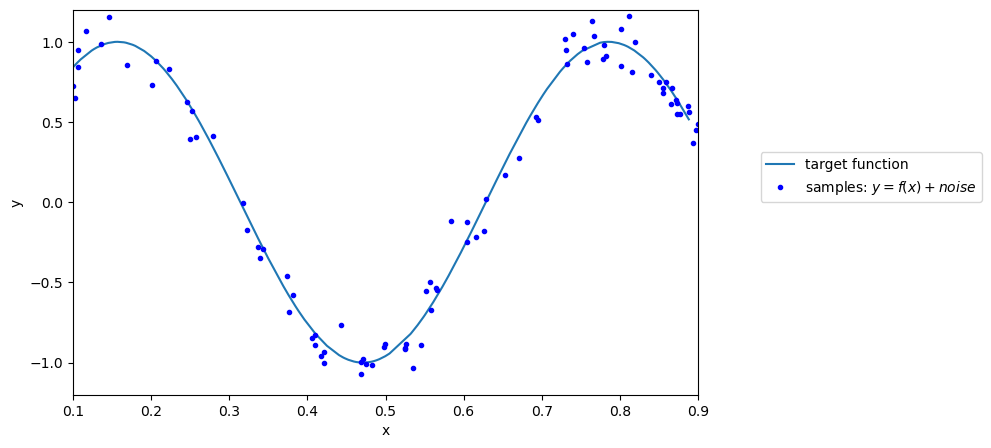

In [2]:
plt.figure(figsize=(10, 5))

# Plot f
plt.plot(X_ideal, Y_ideal, label="target function")

# Plot training data
plt.plot(X_train, Y_train, ".b", label="samples: $y = f(x)+noise$")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(loc=(1.1, 0.5))
plt.xlabel("x")
plt.ylabel("y")

plt.subplots_adjust(right=0.75)
plt.show()

**(/3)** Pour le moment, chaque $x$ dans `X_train` contient une valeur réelle.

- À l'aide d'une **régression linéaire**, implémentez une fonction qui prend en paramètre un degré $k\in\mathbb{N}$ et retourne le polynôme de degré $k$
$$
h_\theta(x) = \theta_0 + \theta_1x + \dots + \theta_kx^k
$$
qui minimise la fonction de coût "moindres carrés". *Utilisez `scikit-learn` pour appliquer la régression linéaire.*
- **Expliquez dans votre code (avec un commentaire) comment vous augmentez le nombre de features de vos exemples (si vous utilisez une fonction de `numpy`, expliquez ce qu'elle représente).**
- Vérifiez la taille de votre ensemble d'entraînement après avoir augmenté ses features en utilisant un `assert(condition)`.



In [3]:
from sklearn.linear_model import LinearRegression

#source de la fonction augment_features:  chatgpt
def augment_features(X, degree):
    """
    Prend un paramètre un vecteur `X` contenant m exemples avec chacun une feature x, et retourne une matrice
    avec m lignes telle que chaque ligne contient les features (1, x, x^2, ..., x^degree).
    """
    X_augmented = np.ones((X.shape[0], degree + 1))
    
    for i in range(1, degree + 1):
        X_augmented[:, i] = np.power(X, i)
    
    return X_augmented

def fit_polynomial(X, Y, degree):
    """
    Retourne le modèle scikit-learn qui calcule le polynôme de degré `degree`
    qui minimise les moindres carrés sur les données `X` avec target `Y`.
    """
    X_augmented = augment_features(X, degree)
    model = LinearRegression().fit(X_augmented, Y)
    
    return model
#source de  fit_polynomial https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

On affiche les prédictions de votre modèle pour quelques valeurs de $k$.

[ 0.         -6.70385784  7.46972262]
[   0.           21.7145242  -116.03744212  162.04875276  -16.55747862
  -54.93436444]
[ 0.00000000e+00 -5.51791695e+02  3.85959956e+04 -1.39161220e+06
  3.06075833e+07 -4.49899944e+08  4.68541774e+09 -3.59442971e+10
  2.08555148e+11 -9.31770854e+11  3.24363717e+12 -8.85993329e+12
  1.90409131e+13 -3.21466095e+13  4.23660458e+13 -4.30478098e+13
  3.30253227e+13 -1.84829239e+13  7.11520231e+12 -1.68338022e+12
  1.84430954e+11]


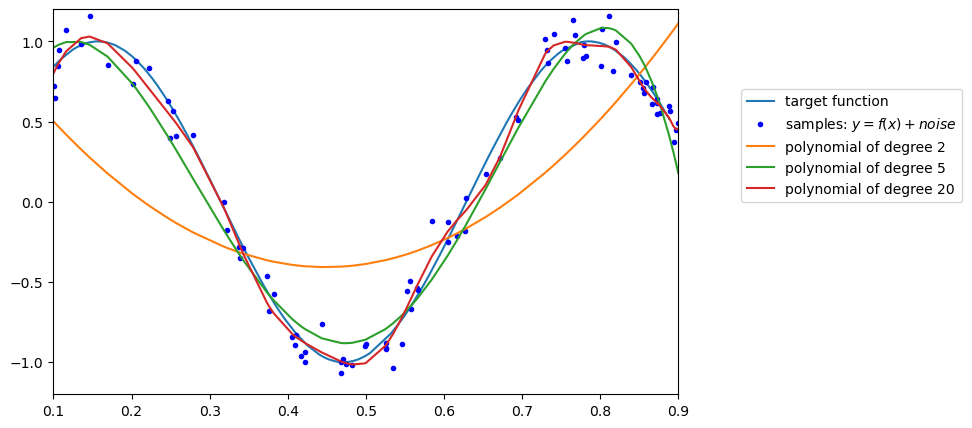

In [4]:
# Code du cours 7

plt.figure(figsize=(10, 5))

# Plot f
plt.plot(X_ideal, Y_ideal, label="target function")

# Plot training data (the first one)
plt.plot(X_train, Y_train, ".b", label="samples: $y = f(x)+noise$")

def apply_polynomial(model, X):
    '''
    Evaluates a linear regression model on an input sample
    model: linear regression model
    X: input sample
    '''
    degree = model.coef_.size - 1
    Y = model.predict(augment_features(X, degree))
    return Y

def fit_plot(degree):
    model = fit_polynomial(X_train, Y_train, degree)
    print(model.coef_)
    Y_predicted = apply_polynomial(model, X_train)
    plt.plot(X_train, Y_predicted, label="polynomial of degree " + str(degree))

fit_plot(2)
fit_plot(5)
fit_plot(20)

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()

**(/2)** Expliquez avec vos mots le dilemme entre *biais* et *variance*, et comment il est illustré par des prédictions utilisant des polynômes de degré varié.

*Réponse :* La variance correspond à quel point la courbe est ajustée aux points de données. Plus la variance est élevée, plus la courbe s'adapte aux points spécifiques, ce qui la rend moins généraliste. Elle peut alors ne plus prédire de manière précise les valeurs attendues, mais plutôt les valeurs observées.

Le biais, quant à lui, vise à éviter le bruit. Par exemple, si toutes les valeurs de l'ensemble de données sont décalées de 2 par rapport à la réalité, alors le biais doit également être ajusté de 2 pour prédire des valeurs correctes. Un biais trop élevé conduira à un modèle sous-apprenant.

Il faut donc avoir un biais faible et une faible variance.

Dans la suite du TP, on va s'intéresser à la norme du vecteur $\theta$, pour essayer d'établir un lien avec la question de biais et variance.

**(/3)** Affichez un graphique qui donne la **norme euclidienne $||\theta||$ de $\theta$** en fonction du degré du polynôme (par exemple, pour tous les degrés de $1$ à $30$). Utilisez une échelle adaptée sur l'axe vertical pour que les valeurs soient plus lisibles et comparables.

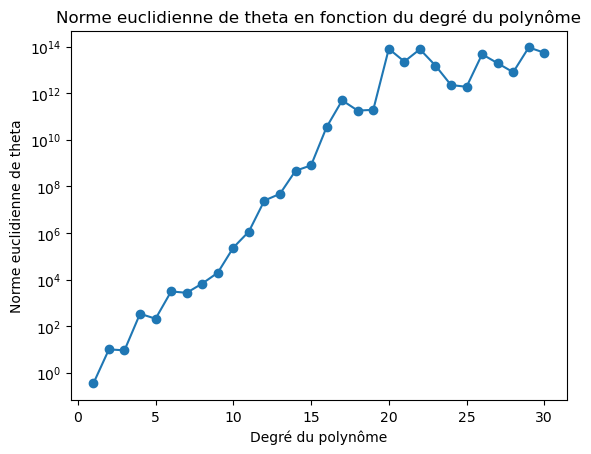

In [5]:
def normeEuclidienne(degrees):
    theta_norms = []

    for degree in degrees:
        model = fit_polynomial(X_train, Y_train, degree)
        theta = model.coef_
        theta_norm = np.linalg.norm(theta)# source de la fonction chagpt
        theta_norms+=[theta_norm]
    return theta_norms

degrees = [i for i in range(1, 31)]
theta_norms = normeEuclidienne(degrees)

# affichage chagpt
plt.figure()
plt.plot(degrees, theta_norms, marker='o', linestyle='-')
plt.title('Norme euclidienne de theta en fonction du degré du polynôme')
plt.xlabel('Degré du polynôme')
plt.ylabel('Norme euclidienne de theta')
plt.yscale('log') 
plt.show()

Que constatez-vous sur la magnitude du vecteur $\theta$ ?

*Réponse :* 
On observe que plus le degré du polynôme est élevé, plus les coefficients du modèle, soit le vecteur 𝜃 augmentent.

Pour limiter l'effet de ce que vous avez observé à la question précédente, on peut modifier la fonction de coût "moindres carrés" de la façon suivante. Pour un hyperparamètre $\alpha \ge 0$ fixé, on définit une fonction de coût
$$
    J(\theta) = \frac{1}{2}\left(\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2\right) + \alpha ||\theta||^2.
$$

**(/1)** Expliquez la différence dans cette formule par rapport à la régression linéaire classique, et l'effet que cela a sur les vecteurs $\theta$ appris.

*Réponse :* 

La régression linéaire est un type d'analyse de régression qui modélise la relation entre les variables, tandis que la régression des moindres carrés est une méthode utilisée pour estimer les paramètres de régression en régression linéaire.

En d'autres termes, la régression des moindres carrés est une approche spécifique à la mise en œuvre de la régression linéaire.

source : https://typeset.io/questions/what-is-the-difference-between-linear-regression-and-least-37qulga7aa#

**(/2)** Cette régression linéaire modifiée correspond à la *ridge regression*, qui est une [fonction disponible dans `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). En utilisant `scikit-learn`, montrez l'effet que vous avez discuté à la réponse ci-dessus sur un graphique adapté.

In [6]:
from sklearn.linear_model import Ridge

def fit_polynomial_regularized(X, Y, degree, alpha):
    """
    Retourne le modèle scikit-learn qui calcule le polynôme de degré `degree`
    qui minimise la fonction de coût J sur les données `X` avec target `Y`.
    """
    X_augmented = augment_features(X, degree)
    reg = Ridge(alpha=alpha)
    reg.fit(X_augmented, Y)
    
    return reg

#source: https://scikit-learn.org/stable/modules/linear_model.html 

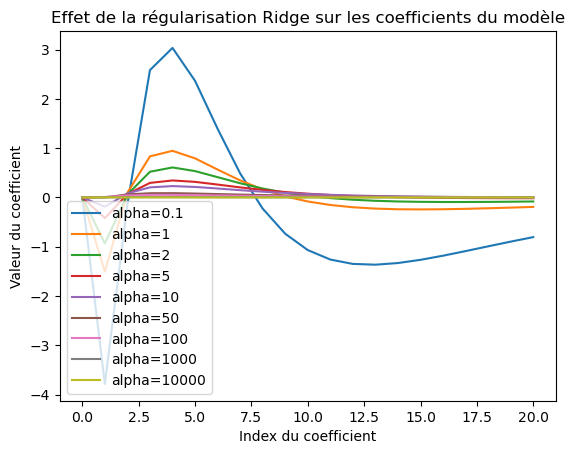

In [7]:
alphas_to_test = [0.1, 1, 2, 5, 10, 50, 100, 1000, 10000] # Vous pouvez tester les alphas dans ce tableau

plt.figure()
degree=20

for alpha in alphas_to_test:
    model = fit_polynomial_regularized(X_train, Y_train, degree, alpha)
    
    coefs = model.coef_
    
    plt.plot(np.arange(len(coefs)), coefs, label=f'alpha={alpha}')

plt.title('Effet de la régularisation Ridge sur les coefficients du modèle')
plt.xlabel('Index du coefficient')
plt.ylabel('Valeur du coefficient')
plt.legend()
plt.show()
#affichage chagpt

**(/3)** Rappelez (en français) comment vous pouvez approximer le biais et la variance en générant plusieurs datasets avec du bruit.

*Réponse :* 

Implémentez une fonction qui retourne le biais et la variance (expérimentale) d'un modèle de *ridge regression* pour un degré et un $\alpha \ge 0$ en argument, et calculez quelques exemples de valeurs. Vous pouvez utiliser la fonction `generate(n_samples, noise)` définie plus haut pour générer plusieurs datasets avec du bruit. **Veillez à commenter votre code.**

In [8]:

def bias_variance(degree, alpha):
    """ Retourne le biais et la variance empiriques d'un modèle qui calcule un modèle
    polynomial de degré `degree` en utilisant une ridge regression avec paramètre `alpha`."""
    
    # Tableaux pour stocker les biais et les variances
    tab_biais = []
    tab_var = []
    
    # Création de plusieurs niveaux de bruit pour observer les différences
    for noise in np.arange(0.1, 1, 0.1):
        # Création des ensembles de données comme précédemment
        X_ideal, Y_ideal = generate(n_samples=n_test, noise=0.0)
        X_train, Y_train = generate(n_samples=n_train, noise=noise)
        X_test, Y_test = generate(n_samples=n_test, noise=noise)
        
        # Calcul d'une régression ridge
        model = fit_polynomial_regularized(X_train, Y_train, degree, alpha)
        
        # Redimensionner X_test en 2D
        X_test_augmented = augment_features(X_test, degree)
        y_pred = model.predict(X_test_augmented)
        
        # Calcul du biais et de la variance 
        bias = np.mean((Y_ideal - y_pred) ** 2)
        variance = np.var(y_pred)
        
        tab_biais.append(bias)
        tab_var.append(variance)
    
    return tab_biais, tab_var


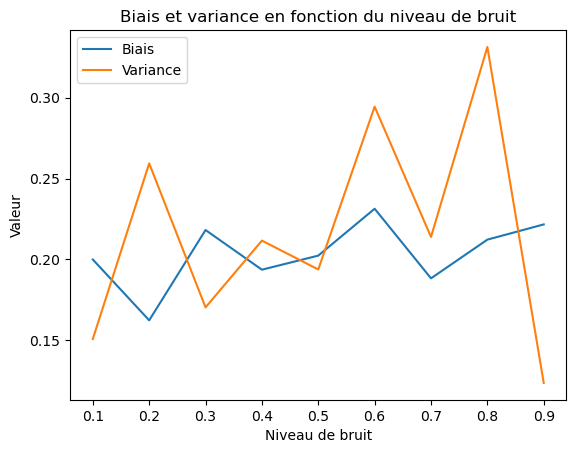

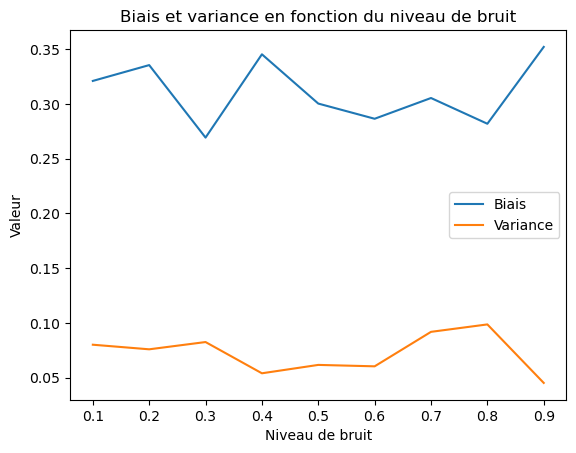

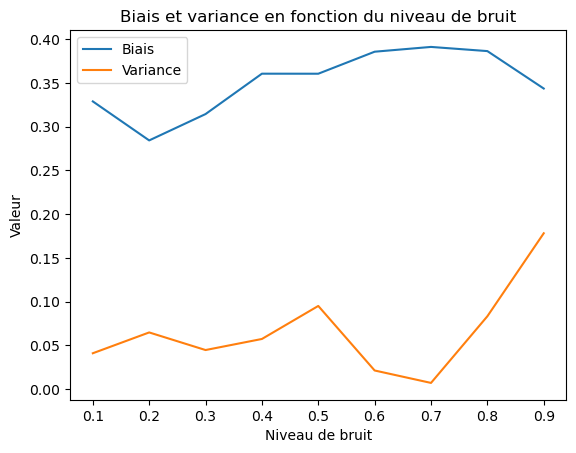

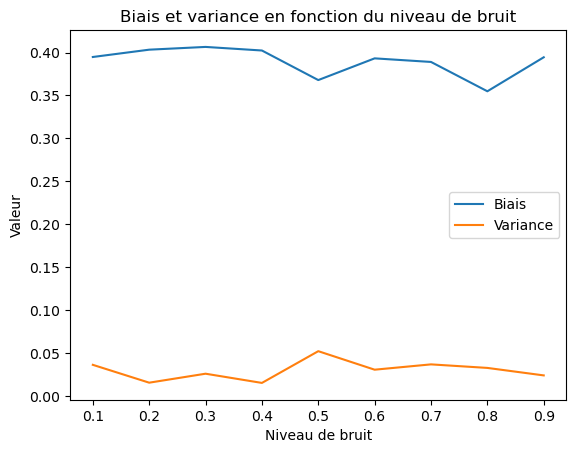

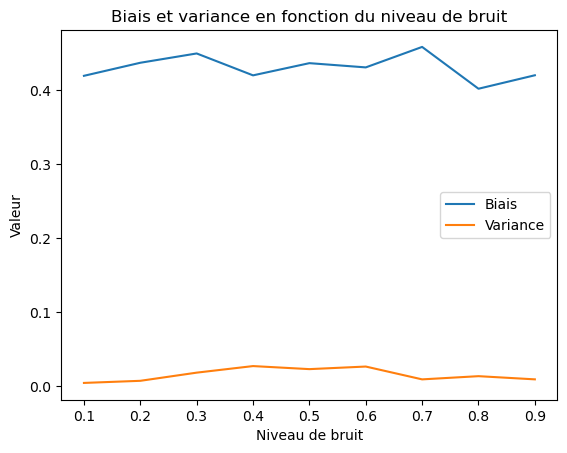

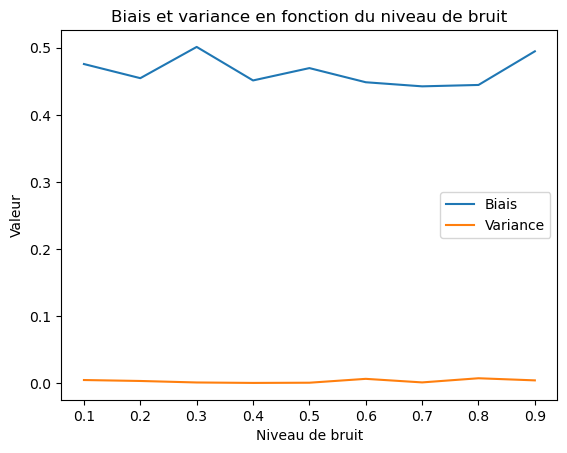

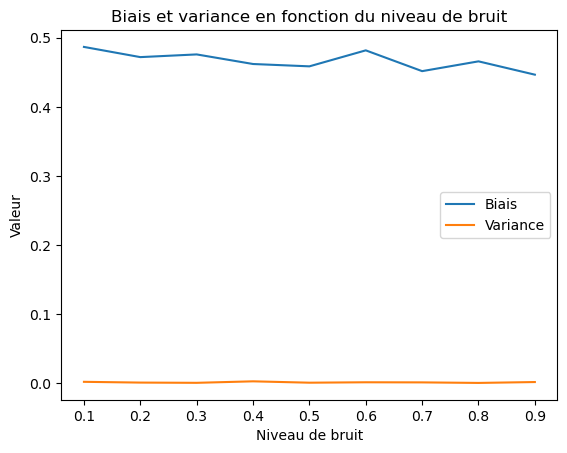

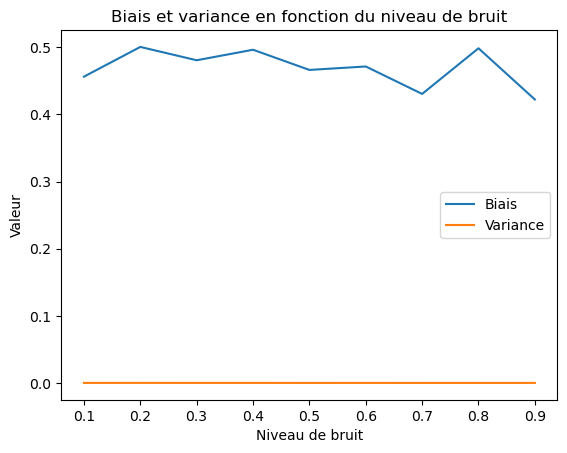

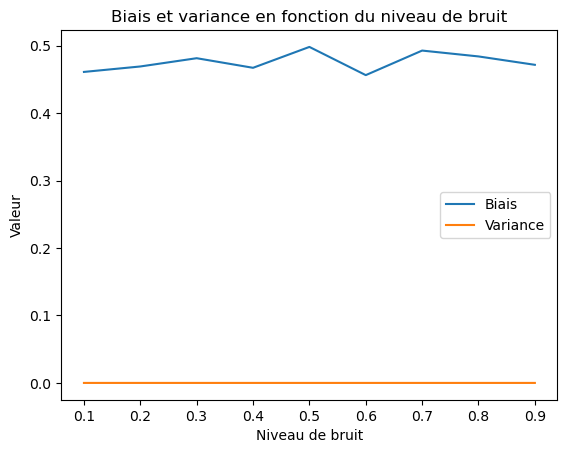

In [9]:
for alpha in alphas_to_test:
    tab_biais, tab_var = bias_variance(degree= 20, alpha=alpha)

    noises = np.arange(0.1, 1, 0.1)

    plt.plot(noises, tab_biais, label='Biais')
    plt.plot(noises, tab_var, label='Variance')

    plt.title('Biais et variance en fonction du niveau de bruit')
    plt.xlabel('Niveau de bruit')
    plt.ylabel('Valeur')
    plt.legend()

    plt.show()


**(/6)** Discutez et étudiez l'impact de l'hyperparamètre $\alpha \ge 0$ sur le biais et la variance. Vous pouvez argumenter :
- sur base d'éléments formels (en réfléchissant à l'intuition via les formules et les définitions), et/ou
- sur base d'éléments empiriques (par exemple, en récoltant des statistiques sur de nombreuses valeurs et en affichant un graphique soutenant votre argumentation).

*Réponse :* On peut constater que plus alpha est petit, plus le biais sera petit, ce qui est souhaitable. Plus alpha est grand, plus la variance sera petite, il est donc important de trouver un equilibre entre pour alpha .

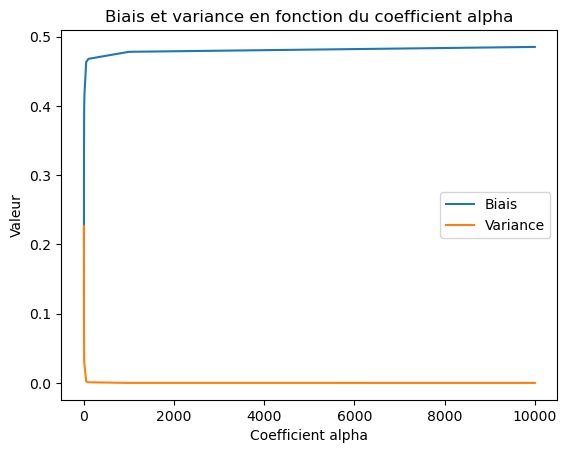

In [10]:
evo_bias = []
evo_var = []

for alpha in alphas_to_test:
    tab_biais, tab_var = bias_variance(degree=20, alpha=alpha)
    evo_bias += [np.mean(tab_biais)]
    evo_var += [np.mean(tab_var)]

plt.plot(alphas_to_test, evo_bias, label='Biais')
plt.plot(alphas_to_test, evo_var, label='Variance')

plt.title('Biais et variance en fonction du coefficient alpha')
plt.xlabel('Coefficient alpha')
plt.ylabel('Valeur')
plt.legend()

plt.show()


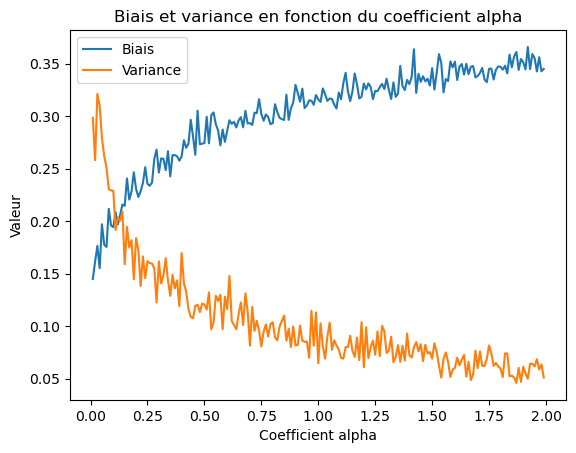

In [11]:
evo_bias = []
evo_var = []

alphas_to_test_lower= np.arange(0.01, 2, 0.01)

for alpha in alphas_to_test_lower:
    tab_biais, tab_var = bias_variance(degree=20, alpha=alpha)
    evo_bias += [np.mean(tab_biais)]
    evo_var += [np.mean(tab_var)]

plt.plot(alphas_to_test_lower, evo_bias, label='Biais')
plt.plot(alphas_to_test_lower, evo_var, label='Variance')

plt.title('Biais et variance en fonction du coefficient alpha')
plt.xlabel('Coefficient alpha')
plt.ylabel('Valeur')
plt.legend()

plt.show()


**Bonus (/1,5)** Quand vous affichez les valeurs du vecteur $\theta$ après apprentissage (pour la régression linéaire et pour la *ridge regression* avec `scikit-learn`), observez-vous quelque chose de surprenant sur la valeur du coefficient $\theta_0$ ?

*Réponse :* 
On constate que les valeurs de theta pour la régression lineaire sont plus greanque que celle de rigde regression. Cela peut etre du a fit_intercept qui est a true par default est qui permet de s'adapter et donnée, et donc de potientiellement rajouter du biais. 

In [12]:
#ridge regression
model = fit_polynomial_regularized(X_train, Y_train, degree, alpha)
print (model.coef_)

#lineaire
model = fit_polynomial(X_train, Y_train, degree)
print(model.coef_)

[ 0.         -0.93697355  0.05980313  0.52259166  0.61018518  0.53607694
  0.41241465  0.28816882  0.18145883  0.09664541  0.0324785  -0.01420242
 -0.04687072 -0.06868356 -0.08228643 -0.08980219 -0.09289038 -0.09282579
 -0.09057487 -0.08686227 -0.08222568]
[ 0.00000000e+00 -5.51791695e+02  3.85959956e+04 -1.39161220e+06
  3.06075833e+07 -4.49899944e+08  4.68541774e+09 -3.59442971e+10
  2.08555148e+11 -9.31770854e+11  3.24363717e+12 -8.85993329e+12
  1.90409131e+13 -3.21466095e+13  4.23660458e+13 -4.30478098e+13
  3.30253227e+13 -1.84829239e+13  7.11520231e+12 -1.68338022e+12
  1.84430954e+11]


En vous basant sur la [documentation de la régression linéaire de `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), expliquez à quoi cela peut être dû. Modifiez une ligne de votre code plus haut pour éviter cela (ajoutez `# Bonus` en commentaire à côté de la ligne)